In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [26]:
unemployment=pd.read_excel(r"C:\Users\Windows 7\Documents\mypython\Pandas Course Resources\project_data\india.xlsx",
                          header=0,
                          names=["Region","Date","Estimated_Unemployment_Rate","Estimated_Employed","Estimated_Labour_Participation_Rate",
                                "Area"],
                          #skiprows=[0],
                          parse_dates=["Date"],
                          )

In [12]:
unemployment.set_index("Date",inplace=True)

In [10]:
#checking for null values
unemployment.isna().sum()

Region                                 0
Date                                   0
Estimated_Unemployment_Rate            0
Estimated_Employed                     0
Estimated_Labour_Participation_Rate    0
Area                                   0
dtype: int64

In [16]:
unemployment.dtypes

Region                                  object
Estimated_Unemployment_Rate            float64
Estimated_Employed                       int64
Estimated_Labour_Participation_Rate    float64
Area                                    object
dtype: object

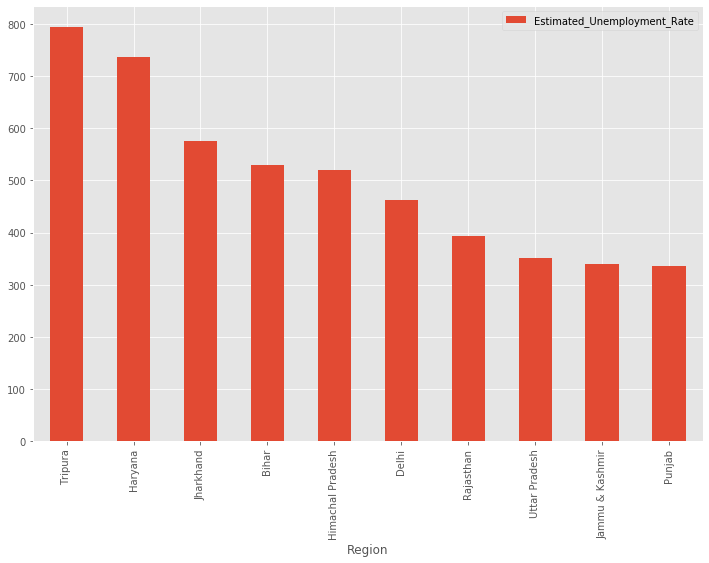

In [27]:
# top 10 states with highest unemployment rates
(unemployment.
 groupby(["Region"])[["Estimated_Unemployment_Rate"]].sum()
 .sort_values('Estimated_Unemployment_Rate',ascending=False)
).iloc[:10].plot.bar();

# Analysis on the basis of time

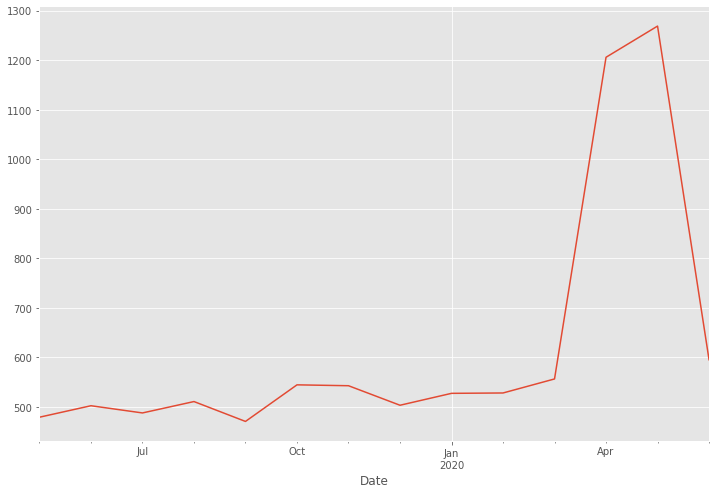

In [29]:
# Set a date index, graby the Estimated_Unemployment_Rate column, and calculating a monthly sum.
(unemployment.set_index("Date")
.loc[:,"Estimated_Unemployment_Rate"]
 .resample("M")
 .sum()
 .plot()
);

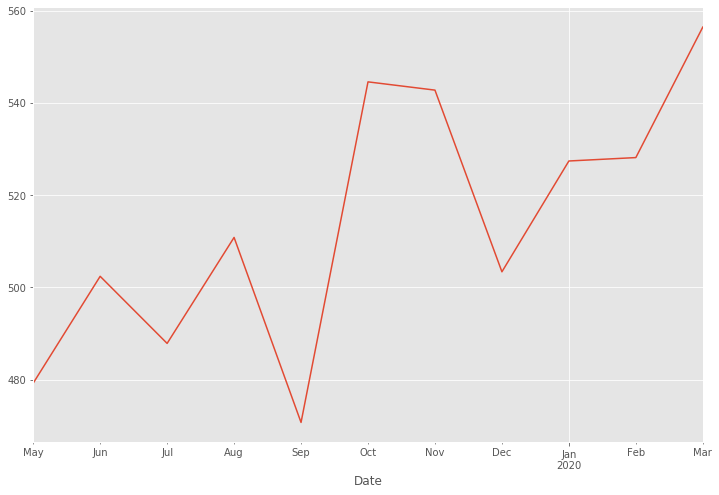

In [40]:
(unemployment.set_index("Date")
.loc["2019-03-01":"2020-04-01","Estimated_Unemployment_Rate"]
 .resample("M")
 .sum()
 .plot()
);

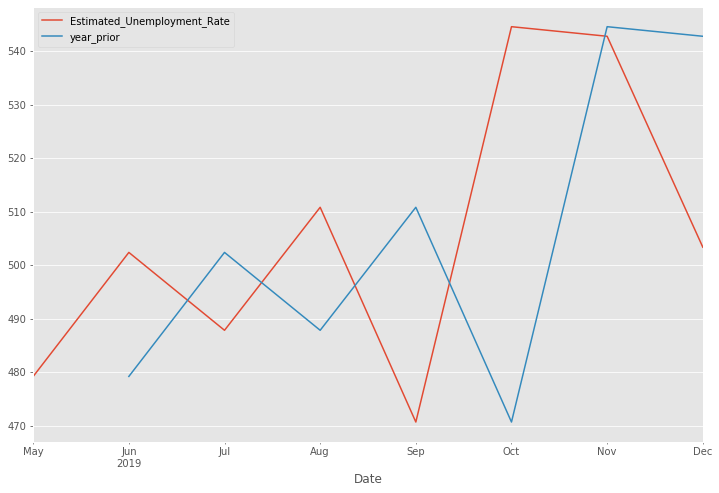

In [51]:
#comparing the differences on monthly basis
(unemployment.set_index("Date")
.loc[:, ["Estimated_Unemployment_Rate"]]
 .resample("M")
 .sum()
 .assign(year_prior =lambda x: x["Estimated_Unemployment_Rate"].shift(1))
 .loc["2019"]
 .plot()
);